In [1]:
import pandas as pd
import seaborn as sb

low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

# dataset

Os dados utilizados nas análises abaixo foram extraídos de:
http://floripadadosabertos.univille.br/dataset/fila-de-atendimento-saude-publica-de-sc

In [2]:
filename = '~/Downloads/fila-pública-2017-11-30.csv'
df = pd.read_csv(filename)

In [3]:
df.shape

(1306967, 17)

In [4]:
df.describe()

,POSIÇÃO,TEMPO MÉDIO DE ESPERA(DIAS),NASCIMENTO,CNES DA UNIDADE SOLICITANTE,CÓDIGO SIGTAP DO PROCEDIMENTO
count,1.306967e+06,1.288724e+06,0.0,1.306967e+06,1.305728e+06
mean,2.502004e+03,1.942741e+02,NaN,3.539747e+06,2.414849e+08
std,3.291319e+03,3.145126e+02,NaN,1.972460e+06,5.118480e+07
min,1.000000e+00,0.000000e+00,NaN,1.925900e+04,2.040601e+07
25%,2.490000e+02,3.100000e+01,NaN,2.418916e+06,2.020602e+08
50%,1.011000e+03,9.900000e+01,NaN,2.660792e+06,2.060101e+08
75%,3.351000e+03,1.590000e+02,NaN,5.465893e+06,3.010101e+08
max,1.874000e+04,2.019000e+03,NaN,9.362223e+06,7.010701e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306967 entries, 0 to 1306966
Data columns (total 17 columns):
SERVIÇO                               1306967 non-null object
CENTRAL DE REGULAÇÃO/RESPONSÁVEL      1306967 non-null object
MUNICÍPIO DE RESIDÊNCIA               1306967 non-null object
POSIÇÃO                               1306967 non-null int64
TEMPO MÉDIO DE ESPERA(DIAS)           1288724 non-null float64
CLASSIFICAÇÃO                         1306967 non-null object
TIPO DA LISTA                         1306967 non-null object
DOCUMENTO                             1306967 non-null object
DATA DA SOLICITAÇÃO                   1306273 non-null object
CIDADÃO                               1306967 non-null object
NASCIMENTO                            0 non-null float64
DESCRIÇÃO DO PROCEDIMENTO             1306967 non-null object
CNES DA CENTRAL SOLICITANTE           1306967 non-null object
CNES DA CENTRAL EXECUTANTE            1306966 non-null object
CNES DA UNIDADE SOLICITA

In [6]:
df.rename(columns={'MUNICÍPIO DE RESIDÊNCIA': 'MUNICÍPIODERESIDÊNCIA',
                   'CENTRAL DE REGULAÇÃO/RESPONSÁVEL': 'CENTRALDEREGULAÇÃO/RESPONSÁVEL',
                   'TEMPO MÉDIO DE ESPERA(DIAS)': 'TEMPOMÉDIODEESPERA(DIAS)',
                   'DATA DA SOLICITAÇÃO': 'DATADASOLICITAÇÃO',
                   'DESCRIÇÃO DO PROCEDIMENTO': 'DESCRIÇÃODOPROCEDIMENTO',
                   'CNES DA CENTRAL EXECUTANTE': 'CNESDACENTRALEXECUTANTE',
                   'CNES DA UNIDADE SOLICITANTE': 'CNESDAUNIDADESOLICITANTE'
                  }, inplace=True)

In [7]:
df.sample(10)

,SERVIÇO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,MUNICÍPIODERESIDÊNCIA,POSIÇÃO,TEMPOMÉDIODEESPERA(DIAS),CLASSIFICAÇÃO,TIPO DA LISTA,DOCUMENTO,DATADASOLICITAÇÃO,CIDADÃO,NASCIMENTO,DESCRIÇÃODOPROCEDIMENTO,CNES DA CENTRAL SOLICITANTE,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE,CÓDIGO SIGTAP DO PROCEDIMENTO,DESCRIÇÃO DO GRUPO DO PROCEDIMENTO
825302,Consulta,CENTRO DE SAUDE PROCASA,SAO JOSE,397,217.0,3 - Verde,Regulada,706400629304688,15/06/2015 10:01:13,S L D,NaN,CONSULTA EM CIRURGIA VASCULAR - ADULTO,5908418,2692260,2663546,301010072.0,NaN
1090446,Exame,AMBULATORIO GERAL DR DIOGO VERGARA,BLUMENAU,592,21.0,4 - Azul,Regulada,700001239693405,22/08/2017 16:36:10,L C D G,NaN,TGO,2353654,2353654,2512661,202010643.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
254034,Exame,CENTRO DE SAUDE SAO SEBASTIAO,PALHOCA,5480,162.0,4 - Azul,Fila única,700501567765157,14/08/2017 10:41:56,C S C,NaN,FERRO SERICO,421190,6082351,7797893,202010392.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
312467,Exame,CENTRO DE SAUDE RIO GRANDE,PALHOCA,11236,139.0,4 - Azul,Fila única,701400614536838,17/10/2017 16:18:13,F D S,NaN,ANTIPEROXIDASE /ANTI TPO,421190,6082351,5548292,202030555.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
381921,Consulta,SMS SECRETARIA MUNICIPAL DE SAUDE,ARAQUARI,120,35.0,4 - Azul,Regulada,704203201875282,26/10/2017 10:09:36,K S D O L,NaN,CONSULTA EM OFTALMOLOGIA - CLINICA,6426832,6426832,6426832,301010072.0,NaN
1120079,Exame,DOUTOR PEDRINHO,DOUTOR PEDRINHO,924,184.0,4 - Azul,Regulada,700000199391801,22/08/2017 16:17:44,T Z,NaN,RESSONANCIA MAGNETICA DE COLUNA LOMBO-SACRA,420515,2353654,1111106,207010048.0,GRUPO - RESSONANCIA MAGNETICA
804539,Consulta,SECRETARIA MUNICIPAL DE SAUDE DE SANTA ROSA DO...,SANTA ROSA DO SUL,163,338.0,3 - Verde,Regulada,709209294171937,03/07/2017 08:42:21,A T T,NaN,CONSULTA EM PROCTOLOGIA - GERAL,421565,2692260,2647141,301010072.0,NaN
75229,Consulta,UNIDADE BASICA DE SAUDE SANTA LUZIA,CRICIUMA,6112,43.0,4 - Azul,Fila única,703003853960978,27/10/2017 13:42:44,A P F,NaN,CONSULTA EM OFTALMOLOGIA - GERAL,7937547,7937547,2647311,301010072.0,NaN
1230377,Exame,CENTRO DE SAUDE CAMBIRELA FURADINHO,PALHOCA,9054,119.0,4 - Azul,Fila única,705005057124450,06/10/2017 14:45:00,S E D S,NaN,HEMOGLOBINA GLICOSILADA,6082351,6939392,2641534,202010503.0,GRUPO - PATOLOGIA CLINICA (EXAMES DE LABORATORIO)
540713,Exame,SECRETARIA MUNICIPAL DE SAUDE,CHAPECO,865,33.0,4 - Azul,Regulada,700607986944969,16/08/2017 16:14:55,S B,NaN,PAQUIMETRIA ULTRASSONICA - OLHO ESQUERDO,7974671,7974671,6361315,205020020.0,GRUPO - DIAGNOSTICO EM OFTALMOLOGIA


# serviços solicitados por municípios

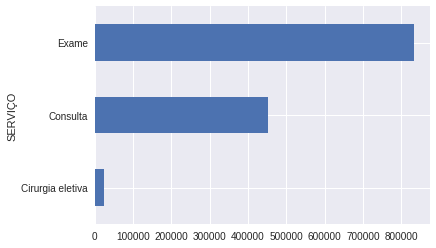

In [8]:
df.groupby('SERVIÇO').size().sort_values().plot(kind='barh')

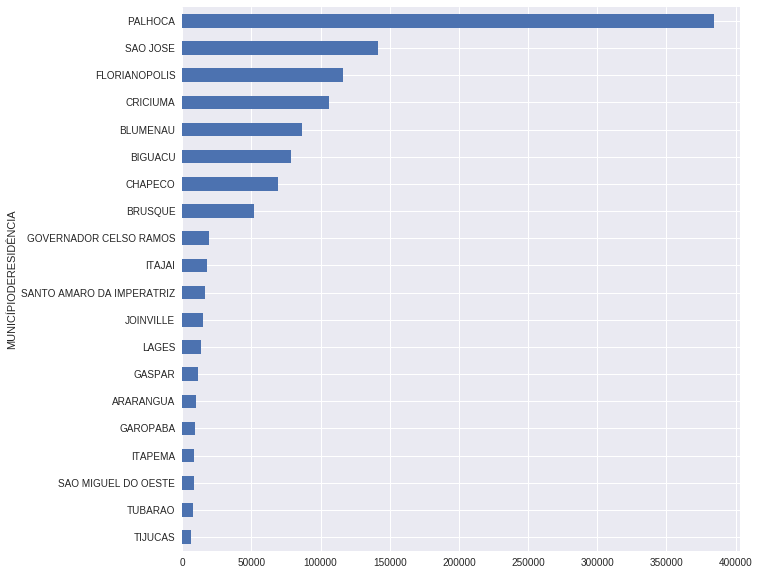

In [9]:
df.groupby('MUNICÍPIODERESIDÊNCIA').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

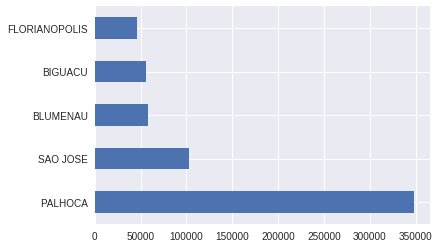

In [10]:
df.query('SERVIÇO == "Exame"')['MUNICÍPIODERESIDÊNCIA'].value_counts().head().plot(kind='barh')

In [11]:
df.query('SERVIÇO == "Exame"')['MUNICÍPIODERESIDÊNCIA'].value_counts().head(15)

PALHOCA                      347913
SAO JOSE                     102497
BLUMENAU                      57577
BIGUACU                       55737
FLORIANOPOLIS                 45871
BRUSQUE                       42011
CHAPECO                       30321
CRICIUMA                      26435
GOVERNADOR CELSO RAMOS        14941
JOINVILLE                     11112
SANTO AMARO DA IMPERATRIZ     11091
GASPAR                         8683
LAGES                          6154
GAROPABA                       5503
ARARANGUA                      4869
Name: MUNICÍPIODERESIDÊNCIA, dtype: int64

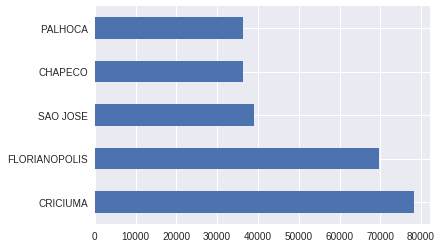

In [12]:
df.query('SERVIÇO == "Consulta"')['MUNICÍPIODERESIDÊNCIA'].value_counts().head().plot(kind='barh')

In [13]:
df.query('SERVIÇO == "Consulta"')['MUNICÍPIODERESIDÊNCIA'].value_counts().head(15)

CRICIUMA                     78185
FLORIANOPOLIS                69684
SAO JOSE                     39062
CHAPECO                      36428
PALHOCA                      36313
BLUMENAU                     26156
BIGUACU                      22435
ITAJAI                       13739
BRUSQUE                       8583
LAGES                         6413
SAO MIGUEL DO OESTE           5587
ITAPEMA                       5566
SANTO AMARO DA IMPERATRIZ     5191
ARARANGUA                     5012
GOVERNADOR CELSO RAMOS        4534
Name: MUNICÍPIODERESIDÊNCIA, dtype: int64

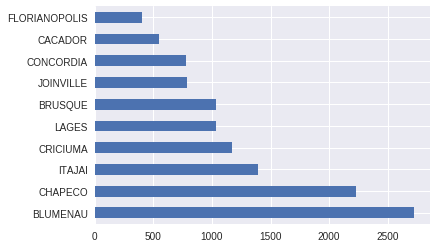

In [14]:
df.query('SERVIÇO == "Cirurgia eletiva"')['MUNICÍPIODERESIDÊNCIA'].value_counts().head(10).plot(kind='barh')

# média de exames por paciente por município

Palhoça tem entre 3 e 5x mais exames por paciente em média do que as outras cidades com alto número de exames solicitados.

In [15]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "PALHOCA"').DOCUMENTO.value_counts().describe()

count    31797.000000
mean        10.941693
std         12.505739
min          1.000000
25%          2.000000
50%          4.000000
75%         18.000000
max         90.000000
Name: DOCUMENTO, dtype: float64

In [16]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "SAO JOSE"').DOCUMENTO.value_counts().describe()

count    54560.000000
mean         1.878611
std          1.901741
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         35.000000
Name: DOCUMENTO, dtype: float64

In [17]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "BLUMENAU"').DOCUMENTO.value_counts().describe()

count    20505.000000
mean         2.807949
std          2.959257
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         35.000000
Name: DOCUMENTO, dtype: float64

In [18]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "BIGUACU"').DOCUMENTO.value_counts().describe()

count    18393.000000
mean         3.030338
std          3.800691
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         37.000000
Name: DOCUMENTO, dtype: float64

In [19]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "FLORIANOPOLIS"').DOCUMENTO.value_counts().describe()

count    28094.000000
mean         1.632769
std          1.789597
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         36.000000
Name: DOCUMENTO, dtype: float64

# pacientes com muitos exames

In [20]:
df.query('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "PALHOCA"').DOCUMENTO.value_counts().head(15)

704207709501384    90
700603418445267    80
700000291920300    80
700505394201153    78
702005327186289    77
707507227682290    75
700000481327406    73
705009265166954    72
702505393010938    72
704300595817291    71
700401459979541    71
700000538700909    70
708402202548668    70
708507058823680    70
706209092555063    70
Name: DOCUMENTO, dtype: int64

As solicitações acontecem no mesmo timestamp, possivelmente indicando um bug no sistema. Os exames entram na fila de CNES executantes diferentes

In [21]:
df.query('DOCUMENTO == 704207709501384')[['DESCRIÇÃODOPROCEDIMENTO','DATADASOLICITAÇÃO', 'CENTRALDEREGULAÇÃO/RESPONSÁVEL', 'POSIÇÃO', 'CNESDACENTRALEXECUTANTE', 'CNESDAUNIDADESOLICITANTE']].sort_values(by='DESCRIÇÃODOPROCEDIMENTO').head(10)

,DESCRIÇÃODOPROCEDIMENTO,DATADASOLICITAÇÃO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,POSIÇÃO,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE
264552,25 HIDROXIVITAMINA D (25 OHD),23/08/2017 11:07:41,CENTRO DE SAUDE VILA NOVA,6519,6082351,7124619
1189115,25 HIDROXIVITAMINA D (25 OHD),23/08/2017 11:07:41,CENTRO DE SAUDE VILA NOVA,4990,6939392,7124619
300253,ACIDO FOLICO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,10017,6082351,7124619
1224544,ACIDO FOLICO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,8466,6939392,7124619
264515,ACIDO URICO,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,6515,6082351,7124619
1189078,ACIDO URICO,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,4986,6939392,7124619
1189079,ANTIBIOGRAMA,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,4986,6939392,7124619
264516,ANTIBIOGRAMA,23/08/2017 11:06:38,CENTRO DE SAUDE VILA NOVA,6515,6082351,7124619
300254,ANTIPEROXIDASE /ANTI TPO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,10017,6082351,7124619
1224545,ANTIPEROXIDASE /ANTI TPO,29/09/2017 13:13:39,CENTRO DE SAUDE VILA NOVA,8466,6939392,7124619


In [22]:
df.query('DOCUMENTO == 700603418445267')[['DESCRIÇÃODOPROCEDIMENTO','DATADASOLICITAÇÃO', 'CENTRALDEREGULAÇÃO/RESPONSÁVEL', 'POSIÇÃO', 'CNESDACENTRALEXECUTANTE', 'CNESDAUNIDADESOLICITANTE']].sort_values(by='DESCRIÇÃODOPROCEDIMENTO').head(10)

,DESCRIÇÃODOPROCEDIMENTO,DATADASOLICITAÇÃO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,POSIÇÃO,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE
194548,25 HIDROXIVITAMINA D (25 OHD),18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134084,25 HIDROXIVITAMINA D (25 OHD),18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
194549,ACIDO URICO,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134085,ACIDO URICO,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
194550,AMILASE,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,339,6082351,5969018
1134086,AMILASE,18/04/2017 17:04:52,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,295,6939392,5969018
1134105,ANTI HBC - IGG ANTICORPOS IGG CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,296,6939392,5969018
194569,ANTI HBC - IGG ANTICORPOS IGG CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,340,6082351,5969018
1134106,ANTI HBC - IGM ANTICORPOS IGM CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,296,6939392,5969018
194570,ANTI HBC - IGM ANTICORPOS IGM CONTRA ANTIGENO ...,18/04/2017 17:27:57,CEAP CENTRO ESPECIALIZADO EM ACONSELHAMENTO E ...,340,6082351,5969018


# quantificando a deduplicação

Se tirássemos todas as duplicações, a fila teria uma redução de 17% nos registros (20% exames, 11% consultas e 1% cirurgias).

In [24]:
def deduplicate_stats(query=None):
    if query:
        df_tmp = df.query(query)
    else:
        df_tmp = df
    total_rows = len(df_tmp)
    unique_rows = len(df_tmp.groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO']))
    unique_rows_same_date = len(df_tmp.groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO', 'DATADASOLICITAÇÃO']))
    reducao_fila = (total_rows - unique_rows) / total_rows
    print('           registros na fila:', total_rows)
    print('    registros únicos na fila:', unique_rows)
    print('          duplicados (total):', total_rows - unique_rows)
    print('duplicados (mesmo timestamp):', total_rows - unique_rows_same_date)
    print('    redução com deduplicação:', int(100*reducao_fila), '%')

In [25]:
# geral
deduplicate_stats()

           registros na fila: 1306967
    registros únicos na fila: 1080625
          duplicados (total): 226342
duplicados (mesmo timestamp): 222124
    redução com deduplicação: 17 %


In [26]:
deduplicate_stats('SERVIÇO == "Exame"')

           registros na fila: 832611
    registros únicos na fila: 658907
          duplicados (total): 173704
duplicados (mesmo timestamp): 171493
    redução com deduplicação: 20 %


In [27]:
deduplicate_stats('SERVIÇO == "Consulta"')

           registros na fila: 451122
    registros únicos na fila: 398828
          duplicados (total): 52294
duplicados (mesmo timestamp): 50405
    redução com deduplicação: 11 %


In [28]:
deduplicate_stats('SERVIÇO == "Cirurgia eletiva"')

           registros na fila: 23234
    registros únicos na fila: 22890
          duplicados (total): 344
duplicados (mesmo timestamp): 226
    redução com deduplicação: 1 %


### deduplicação por município

In [29]:
deduplicate_stats('MUNICÍPIODERESIDÊNCIA == "PALHOCA"')

           registros na fila: 384253
    registros únicos na fila: 223579
          duplicados (total): 160674
duplicados (mesmo timestamp): 160305
    redução com deduplicação: 41 %


In [30]:
deduplicate_stats('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "PALHOCA"')

           registros na fila: 347913
    registros únicos na fila: 199099
          duplicados (total): 148814
duplicados (mesmo timestamp): 148594
    redução com deduplicação: 42 %


In [31]:
deduplicate_stats('SERVIÇO == "Consulta" and MUNICÍPIODERESIDÊNCIA == "PALHOCA"')

           registros na fila: 36313
    registros únicos na fila: 24453
          duplicados (total): 11860
duplicados (mesmo timestamp): 11711
    redução com deduplicação: 32 %


In [32]:
deduplicate_stats('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "SAO JOSE"')

           registros na fila: 102497
    registros únicos na fila: 101021
          duplicados (total): 1476
duplicados (mesmo timestamp): 576
    redução com deduplicação: 1 %


In [33]:
deduplicate_stats('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "BLUMENAU"')

           registros na fila: 57577
    registros únicos na fila: 57535
          duplicados (total): 42
duplicados (mesmo timestamp): 24
    redução com deduplicação: 0 %


In [34]:
deduplicate_stats('SERVIÇO == "Consulta" and MUNICÍPIODERESIDÊNCIA == "BLUMENAU"')

           registros na fila: 26156
    registros únicos na fila: 26139
          duplicados (total): 17
duplicados (mesmo timestamp): 3
    redução com deduplicação: 0 %


In [35]:
deduplicate_stats('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "BIGUACU"')

           registros na fila: 55737
    registros únicos na fila: 45188
          duplicados (total): 10549
duplicados (mesmo timestamp): 10037
    redução com deduplicação: 18 %


In [36]:
deduplicate_stats('SERVIÇO == "Consulta" and MUNICÍPIODERESIDÊNCIA == "BIGUACU"')

           registros na fila: 22435
    registros únicos na fila: 14648
          duplicados (total): 7787
duplicados (mesmo timestamp): 7705
    redução com deduplicação: 34 %


In [37]:
deduplicate_stats('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "FLORIANOPOLIS"')

           registros na fila: 45871
    registros únicos na fila: 45754
          duplicados (total): 117
duplicados (mesmo timestamp): 3
    redução com deduplicação: 0 %


In [38]:
deduplicate_stats('SERVIÇO == "Consulta" and MUNICÍPIODERESIDÊNCIA == "FLORIANOPOLIS"')

           registros na fila: 69684
    registros únicos na fila: 67698
          duplicados (total): 1986
duplicados (mesmo timestamp): 1633
    redução com deduplicação: 2 %


In [39]:
deduplicate_stats('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "BRUSQUE"')

           registros na fila: 42011
    registros únicos na fila: 41479
          duplicados (total): 532
duplicados (mesmo timestamp): 440
    redução com deduplicação: 1 %


In [40]:
deduplicate_stats('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "CHAPECO"')

           registros na fila: 30321
    registros únicos na fila: 30313
          duplicados (total): 8
duplicados (mesmo timestamp): 1
    redução com deduplicação: 0 %


In [41]:
deduplicate_stats('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "CRICIUMA"')

           registros na fila: 26435
    registros únicos na fila: 22584
          duplicados (total): 3851
duplicados (mesmo timestamp): 3826
    redução com deduplicação: 14 %


In [42]:
deduplicate_stats('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "GOVERNADOR CELSO RAMOS"')

           registros na fila: 14941
    registros únicos na fila: 14413
          duplicados (total): 528
duplicados (mesmo timestamp): 422
    redução com deduplicação: 3 %


In [43]:
deduplicate_stats('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "JOINVILLE"')

           registros na fila: 11112
    registros únicos na fila: 11111
          duplicados (total): 1
duplicados (mesmo timestamp): 0
    redução com deduplicação: 0 %


In [44]:
deduplicate_stats('SERVIÇO == "Exame" and MUNICÍPIODERESIDÊNCIA == "SANTO AMARO DA IMPERATRIZ"')

           registros na fila: 11091
    registros únicos na fila: 10667
          duplicados (total): 424
duplicados (mesmo timestamp): 381
    redução com deduplicação: 3 %


Como a porcentagem de duplicações varia muito entre municípios (de 0 a 42%), o problema parece estar atrelado à central de agendamento de alguns municípios como Palhoça e Biguaçu.

### casos de duplicação com timestamps diferentes

In [45]:
df.query('SERVIÇO == "Consulta" and MUNICÍPIODERESIDÊNCIA == "FLORIANOPOLIS"').groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO']).count().query('SERVIÇO > 1').head(10)  

,,SERVIÇO,CENTRALDEREGULAÇÃO/RESPONSÁVEL,MUNICÍPIODERESIDÊNCIA,POSIÇÃO,TEMPOMÉDIODEESPERA(DIAS),CLASSIFICAÇÃO,TIPO DA LISTA,DATADASOLICITAÇÃO,CIDADÃO,NASCIMENTO,CNES DA CENTRAL SOLICITANTE,CNESDACENTRALEXECUTANTE,CNESDAUNIDADESOLICITANTE,CÓDIGO SIGTAP DO PROCEDIMENTO,DESCRIÇÃO DO GRUPO DO PROCEDIMENTO
DOCUMENTO,DESCRIÇÃODOPROCEDIMENTO,,,,,,,,,,,,,,,
102565283890005,CONSULTA EM ORTOPEDIA - JOELHO,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
106406250770005,CONSULTA EM ORTOPEDIA (OMBROS),4,4,4,4,4,4,4,4,4,0,4,4,4,4,0
106494974700008,CONSULTA EM ORTOPEDIA - COLUNA,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
107850981400007,CONSULTA EM ORTOPEDIA (OMBROS),2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
107972018630003,CONSULTA EM CIRURGIA GERAL - ADULTO,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
108641967650000,CONSULTA EM CIRURGIA GERAL - ADULTO,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
120268161090008,CONSULTA EM ORTOPEDIA - JOELHO,3,3,3,3,3,3,3,3,3,0,3,3,3,3,0
120522676990000,CONSULTA EM ORTOPEDIA - COLUNA,2,2,2,2,2,2,2,2,2,0,2,2,2,2,0
120788847680004,CONSULTA EM ORTOPEDIA (OMBROS),2,2,2,2,2,2,2,2,2,0,2,2,2,2,0


O mesmo paciente marcou 4 consultas com ortopedista em 1 ano.
Será que ele perdeu o papel do agendamento?
Daria para fazer uma limpeza, mantê-lo em 314º e excluir os outros registros?
Caso ele vá na consulta que está na posição 314º, as seguintes chegam a ser marcadas? (considerando quando foram marcadas pro mesmo CNES e quando foram pra CNES diferentes)

In [46]:
df.query('DOCUMENTO == 106406250770005')[['SERVIÇO', 'POSIÇÃO', 'DATADASOLICITAÇÃO', 'DESCRIÇÃODOPROCEDIMENTO', 'CNESDACENTRALEXECUTANTE']]

,SERVIÇO,POSIÇÃO,DATADASOLICITAÇÃO,DESCRIÇÃODOPROCEDIMENTO,CNESDACENTRALEXECUTANTE
818446,Consulta,314,24/07/2012 09:32:26,CONSULTA EM ORTOPEDIA (OMBROS),2692260
818622,Consulta,490,19/11/2012 09:48:33,CONSULTA EM ORTOPEDIA (OMBROS),2692260
818878,Consulta,746,21/06/2013 16:07:22,CONSULTA EM ORTOPEDIA (OMBROS),2692260
818943,Consulta,811,26/07/2013 17:31:28,CONSULTA EM ORTOPEDIA (OMBROS),2692260


# pacientes com o mesmo procedimento mais de uma vez na fila

In [47]:
unique_rows = df.groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO'])
duplicated = df.groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO']).count().query('SERVIÇO > 1')[['SERVIÇO']].rename(columns={'SERVIÇO': 'duplicados'})
duplicated.to_csv('pacientes_duplicados.csv', index=False)
duplicated.shape

(225580, 1)

In [48]:
duplicated.sort_values(by='duplicados', ascending=False).head(15)

,,duplicados
DOCUMENTO,DESCRIÇÃODOPROCEDIMENTO,
702808617012564,ULTRA-SONOGRAFIA DE ARTICULACAO MAO DIREITA,14
898002302685808,TOMOGRAFIA COMPUTADORIZADA DO ABDOMEN SUPERIOR,11
"8,98005E+14",CONSULTA EM OTORRINOLARINGOLOGIA GERAL,10
708208193824642,CONSULTA EM GASTROENTEROLOGIA - GERAL,8
"8,9805E+14",CONSULTA EM ORTOPEDIA - GERAL,7
898002858929019,CONSULTA EM REUMATOLOGIA - GERAL,6
709201250723236,CONSULTA EM ORTOPEDIA (OMBROS),6
124836680560000,CONSULTA EM OFTALMOLOGIA - GERAL,6
"8,98004E+14",CONSULTA EM OTORRINOLARINGOLOGIA GERAL,6


# fila sem duplicações

In [49]:
df_deduplified = df.sort_values(by='POSIÇÃO')
df_deduplified.drop_duplicates(subset=['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO'], keep='first', inplace=True)
df_deduplified.to_csv('fila_deduplicada.csv', index=False)
df_deduplified.shape

(1080625, 17)

In [50]:
def deduplicate_stats(query=None):
    if query:
        df_tmp = df.query(query)
    else:
        df_tmp = df
    total_rows = len(df_tmp)
    unique_rows = len(df_tmp.groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO']))
    unique_rows_same_date = len(df_tmp.groupby(['DOCUMENTO', 'DESCRIÇÃODOPROCEDIMENTO', 'DATADASOLICITAÇÃO']))
    reducao_fila = (total_rows - unique_rows) / total_rows
    print('           registros na fila:', total_rows)
    print('    registros únicos na fila:', unique_rows)
    print('          duplicados (total):', total_rows - unique_rows)
    print('duplicados (mesmo timestamp):', total_rows - unique_rows_same_date)
    print('    redução com deduplicação:', int(100*reducao_fila), '%')

### análise de pacientes / habitante (por município)

In [51]:
def perc_pacientes(municipio, populacao):
    pacientes = len(set(df.query('MUNICÍPIODERESIDÊNCIA == "'+municipio+'"')['DOCUMENTO']))
    perc_pacientes = pacientes / populacao
    print(int(100*perc_pacientes), '% -', municipio)

Por que Joinville tem tão poucas pessoas na fila do SUS? As pessoas são mais saudáveis ou mais ricas?

In [52]:
perc_pacientes('PALHOCA', 119360)
perc_pacientes('FLORIANOPOLIS', 249477)
perc_pacientes('SAO JOSE', 210513)
perc_pacientes('BLUMENAU', 309214)
perc_pacientes('BIGUACU', 63440)
perc_pacientes('BRUSQUE', 102025)
perc_pacientes('CHAPECO', 166040)
perc_pacientes('CRICIUMA', 133031)
perc_pacientes('GOVERNADOR CELSO RAMOS', 13944)
perc_pacientes('JOINVILLE', 486803)
perc_pacientes('SANTO AMARO DA IMPERATRIZ', 17602)

35 % - PALHOCA
32 % - FLORIANOPOLIS
34 % - SAO JOSE
11 % - BLUMENAU
40 % - BIGUACU
13 % - BRUSQUE
26 % - CHAPECO
45 % - CRICIUMA
39 % - GOVERNADOR CELSO RAMOS
2 % - JOINVILLE
42 % - SANTO AMARO DA IMPERATRIZ


## exames mais solicitados

In [53]:
df['DESCRIÇÃODOPROCEDIMENTO'].value_counts().to_frame().head(10)

,DESCRIÇÃODOPROCEDIMENTO
CONSULTA EM OFTALMOLOGIA - GERAL,66417
CONSULTA EM OTORRINOLARINGOLOGIA - GERAL,29972
ULTRA-SONOGRAFIA TRANSVAGINAL,28250
CONSULTA EM ORTOPEDIA - GERAL,26785
HEMOGRAMA COMPLETO,26014
TRIGLICERIDEOS,21507
CREATININA,19010
GLICEMIA DE JEJUM,18521
ENDOSCOPIA DIGESTIVA ALTA,17761
CONSULTA EM DERMATOLOGIA - GERAL,17345


### cidades que mais solicitam o exame mais procurado

In [54]:
df.query('DESCRIÇÃODOPROCEDIMENTO == "CONSULTA EM OFTALMOLOGIA - GERAL"')['MUNICÍPIODERESIDÊNCIA'].value_counts().to_frame().head(10) 

,MUNICÍPIODERESIDÊNCIA
FLORIANOPOLIS,19032
CRICIUMA,13661
CHAPECO,9142
PALHOCA,7677
SAO JOSE,2633
LAGES,2004
SAO JOAO BATISTA,1597
CONCORDIA,1175
SAO MIGUEL DO OESTE,1131
ARARANGUA,1040


Pacientes de Canelinha, ao solicitar uma consulta em oftalmologia, são direcionadas a 4 centrais executantes diferentes, que possuem tempo de espera entre 34 e 417 dias. Sugestão: rotear as pessoas para centrais com menos pacientes.  

In [55]:
df.query('DESCRIÇÃODOPROCEDIMENTO == "CONSULTA EM OFTALMOLOGIA - GERAL"').groupby(['CÓDIGO SIGTAP DO PROCEDIMENTO', 'MUNICÍPIODERESIDÊNCIA', 'CNESDACENTRALEXECUTANTE', 'TEMPOMÉDIODEESPERA(DIAS)', 'CLASSIFICAÇÃO']).count()[['POSIÇÃO']].query('MUNICÍPIODERESIDÊNCIA == "CANELINHA"') 

POSIÇÃO
CÓDIGO SIGTAP DO PROCEDIMENTO MUNICÍPIODERESIDÊNCIA CNESDACENTRALEXECUTANTE TEMPOMÉDIODEESPERA(DIAS) CLASSIFICAÇÃO         
301010072.0                   CANELINHA             2692260                 417.0                    2 - Amarelo         12
                                                                                                     3 - Verde            7
                                                                                                     4 - Azul             6
                                                    6515681                 44.0                     1 - Vermelho         4
                                                                                                     4 - Azul            34
                                                                            45.0                     1 - Vermelho         1
                                                                                                     4 - Azul            32
                                                    6541666                 34.0                     4 - Azul             4
                                                    6939392                 395.0                    4 - Azul            16

In [56]:
datas = df.query('DESCRIÇÃODOPROCEDIMENTO == "CONSULTA EM OFTALMOLOGIA - GERAL" and MUNICÍPIODERESIDÊNCIA == "CANELINHA"').DATADASOLICITAÇÃO  
print('min', min(pd.to_datetime(datas)))
print('max', max(pd.to_datetime(datas)))

min 2014-12-12 13:47:16
max 2017-11-27 14:16:20
